In [1]:
# Import Basic libraries
import pandas as pd
import seaborn as sb
import matplotlib as mp
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
plt.style.use('seaborn')

In [2]:
# import dataset as CSV
WeekDeathVac = pd.read_csv('Dataset\\Week_Death_Vac.csv')
Variants = pd.read_csv('Dataset\\Variants.csv')

In [3]:
WeekDeathVac.head()

,Weekly Deaths,Weekly Cases,PercentOneDose,PercentCompleted,PercentFirstBooster,Administered,PeopleOneOrMore,PercentSeniorBooster
0,9523,4144938,74.5,63.8,39.4,532523597,247456745,0.8
1,12076,5489860,75.1,64.1,41.2,539630858,249319876,0.8
2,14401,5589403,75.5,64.4,42.4,545207423,250756791,0.9
3,17675,4401234,75.9,64.7,43.3,549748283,251888888,0.9
4,17299,2692886,76.1,65.0,43.8,553157166,252744602,1.0


In [4]:
Variants.head()

,variant,week_ending,share
0,BA.4.6,2022-10-22,0.113205
1,BF.7,2022-10-22,0.066507
2,BQ.1,2022-10-22,0.093988
3,BA.2.75,2022-10-22,0.015594
4,BQ.1.1,2022-10-22,0.071613


# Anomaly Detection

## Local Outlier Factor

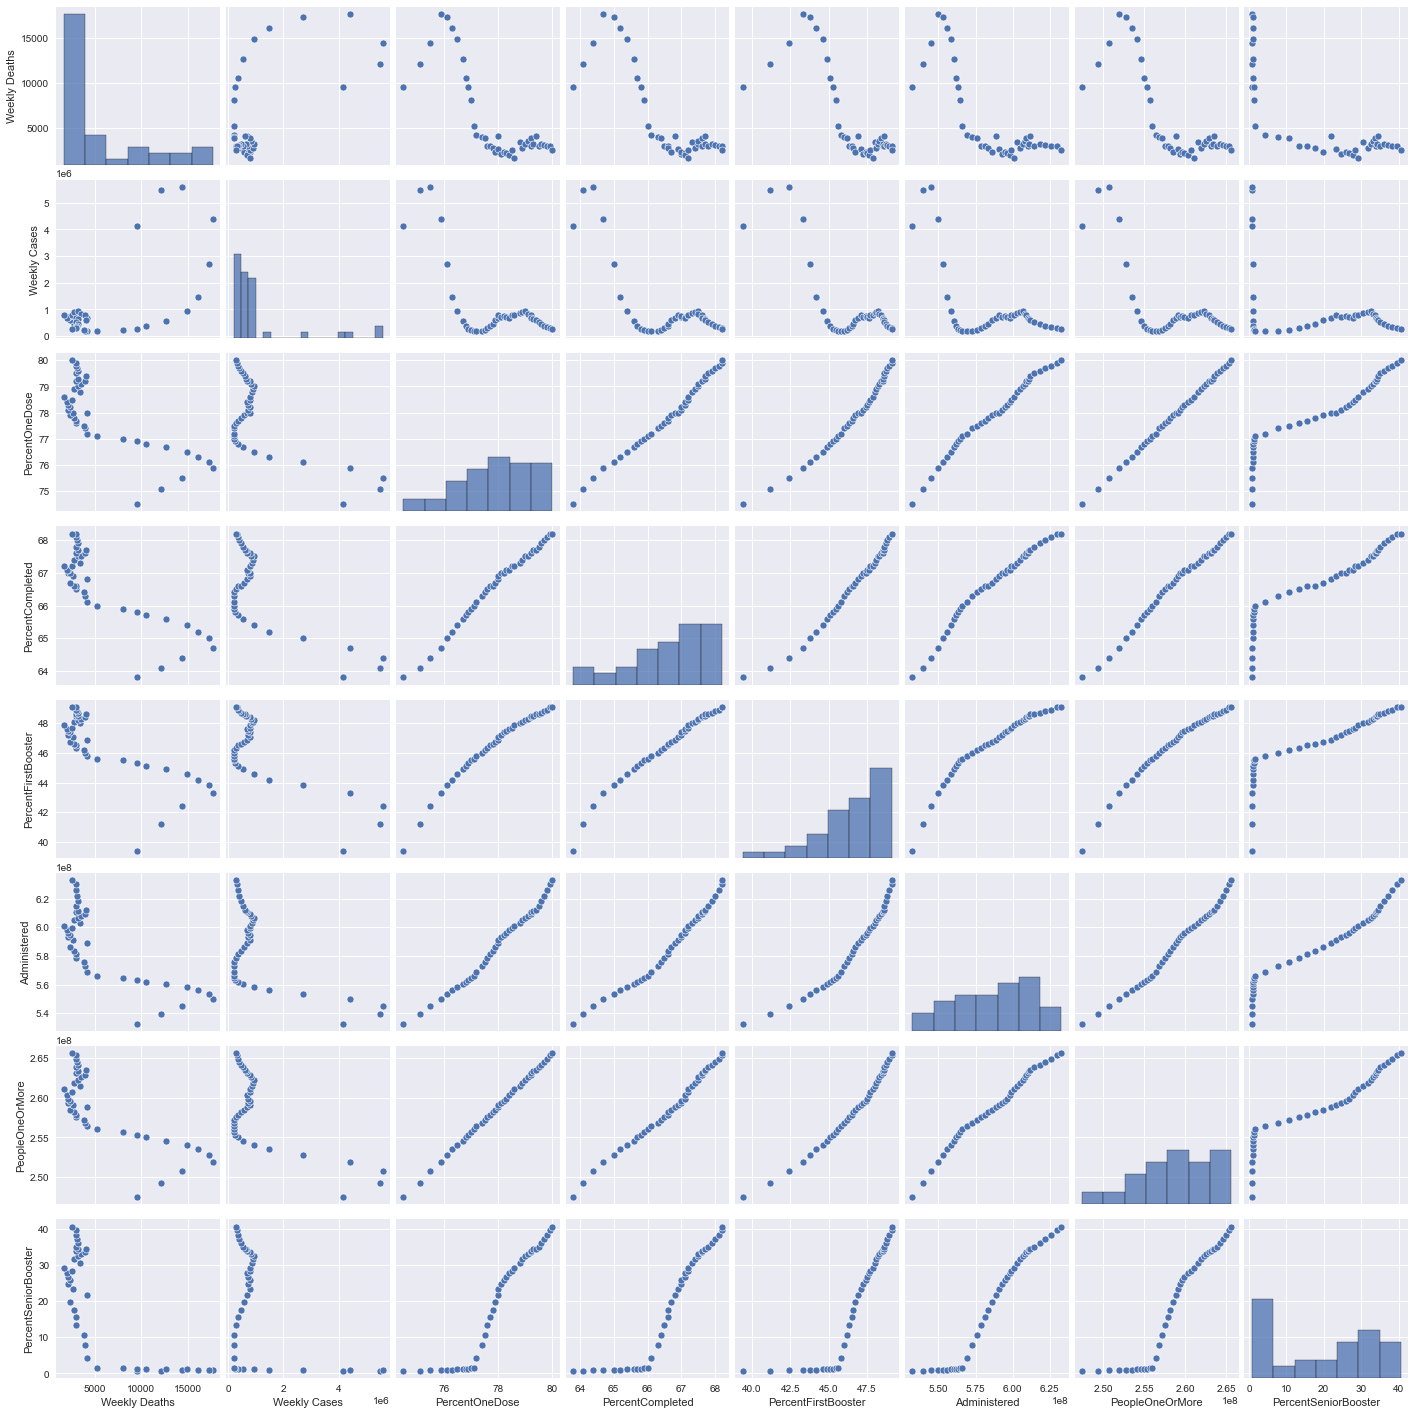

In [5]:
# Plot the Raw Data on 2D grids
sb.pairplot(WeekDeathVac)

In [6]:
# Set the Parameters for Neighborhood
num_neighbors = 5      # Number of Neighbors
cont_fraction = 0.05    # Fraction of Anomalies

# Create Anomaly Detection Model using LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors = num_neighbors, contamination = cont_fraction)

# Fit the Model on the Data and Predict Anomalies
lof.fit(WeekDeathVac)

LocalOutlierFactor(contamination=0.05, n_neighbors=5)

<AxesSubplot:xlabel='Anomaly', ylabel='count'>

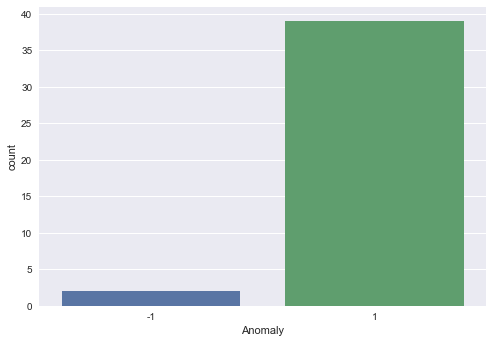

In [7]:
# Predict the Anomalies
labels = lof.fit_predict(WeekDeathVac)

# Append Labels to the Data
WeekDeathVac_labeled = WeekDeathVac.copy()
WeekDeathVac_labeled["Anomaly"] = pd.Categorical(labels)

# Summary of the Anomaly Labels
sb.countplot(x = WeekDeathVac_labeled["Anomaly"])

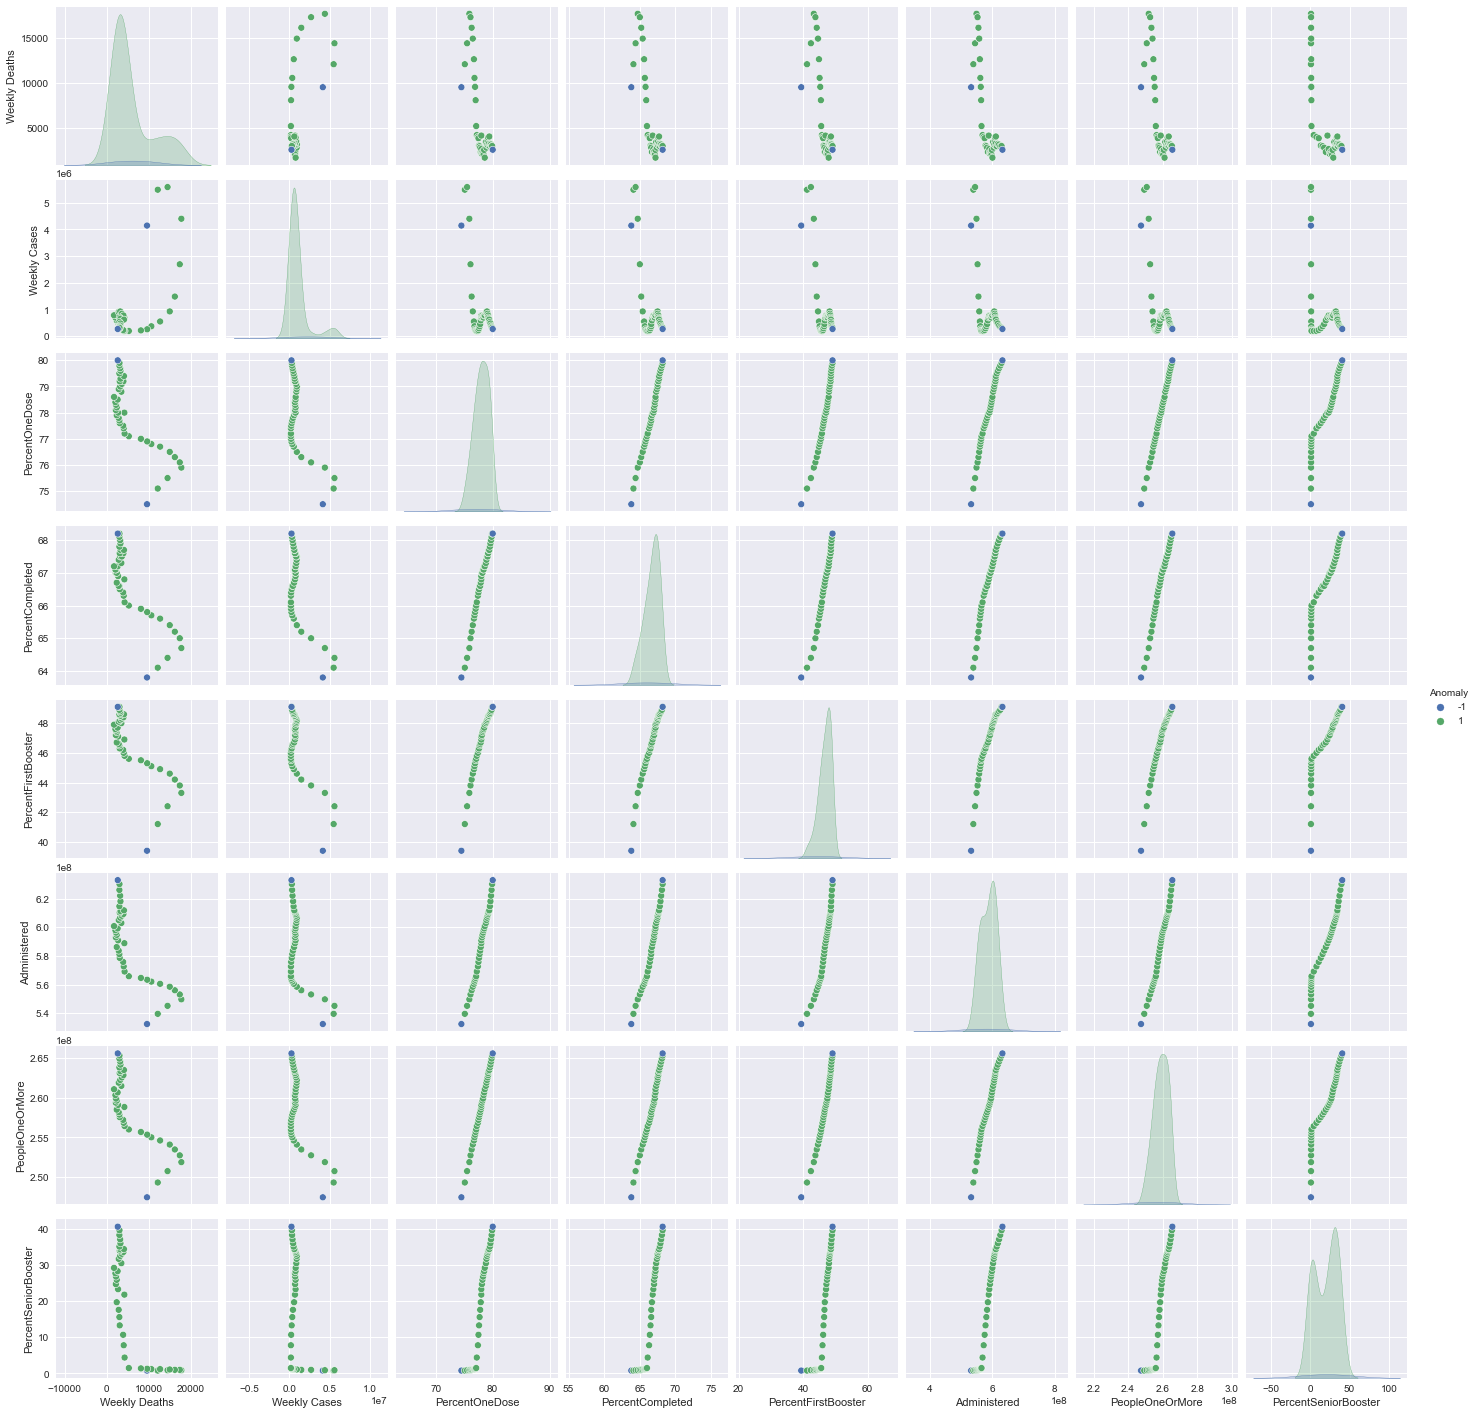

In [8]:
# Visualize the Anomalies in the Data
sb.pairplot(WeekDeathVac_labeled, vars = WeekDeathVac.columns.values, hue = "Anomaly")

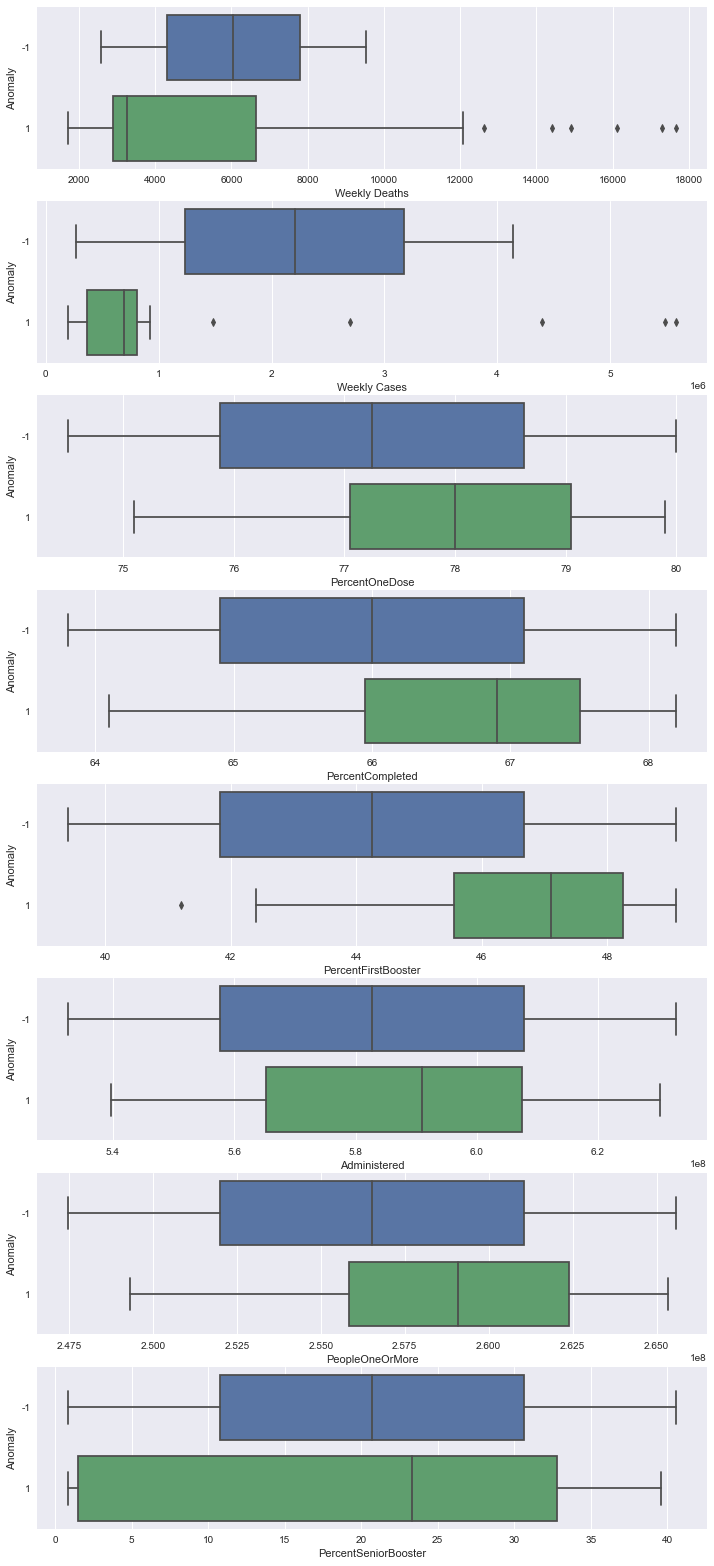

In [9]:
# Boxplots for all Features against the Anomalies
f, axes = plt.subplots(8, 1, figsize=(12,28))

count = 0
for var in WeekDeathVac:
    sb.boxplot(x = var, y = 'Anomaly', data = WeekDeathVac_labeled, ax = axes[count])
    count += 1

## Box-and-Whisker

In [10]:
# function to remove outliers in box-plot
def identify_boxliers(df, li, an):
    
    dup = df
    q_low = []
    q_high = []
    anomaly = []
    
    for i in li:
        q1 = dup[i].quantile(0.25)
        q3 = dup[i].quantile(0.75)
        iqr = q3 - q1
        low_lim = q1 - 1.5 * iqr
        upp_lim = q3 + 1.5 * iqr
        q_low.append(low_lim)
        q_high.append(upp_lim)
    
    n = 0
    for i in li:
        df.loc[(df[i] < q_low[n]) | (df[i] > q_high[n]), an] = -1
        n += 1
    return df

In [11]:
WeekDeathVac_LabeledBox = WeekDeathVac.copy()
WeekDeathVac_LabeledBox['Anomaly'] = 1

WeekDeathVac_LabeledBox = identify_boxliers(WeekDeathVac_LabeledBox, list(WeekDeathVac.columns.values), 'Anomaly')
WeekDeathVac_LabeledBox['Anomaly'] = WeekDeathVac_LabeledBox['Anomaly'].astype("category")
display(WeekDeathVac_LabeledBox)

,Weekly Deaths,Weekly Cases,PercentOneDose,PercentCompleted,PercentFirstBooster,Administered,PeopleOneOrMore,PercentSeniorBooster,Anomaly
0,9523,4144938,74.5,63.8,39.4,532523597,247456745,0.8,-1
1,12076,5489860,75.1,64.1,41.2,539630858,249319876,0.8,-1
2,14401,5589403,75.5,64.4,42.4,545207423,250756791,0.9,-1
3,17675,4401234,75.9,64.7,43.3,549748283,251888888,0.9,-1
4,17299,2692886,76.1,65.0,43.8,553157166,252744602,1.0,-1
5,16128,1482175,76.3,65.2,44.2,556064267,253483983,1.0,-1
6,14920,924965,76.5,65.4,44.6,558534694,254102352,1.1,1
7,12631,547613,76.7,65.6,44.9,560571488,254614257,1.2,1
8,10556,367716,76.8,65.7,45.1,562109987,255013763,1.2,1
9,9560,254708,76.9,65.8,45.3,563421788,255355917,1.3,1


<AxesSubplot:xlabel='Anomaly', ylabel='count'>

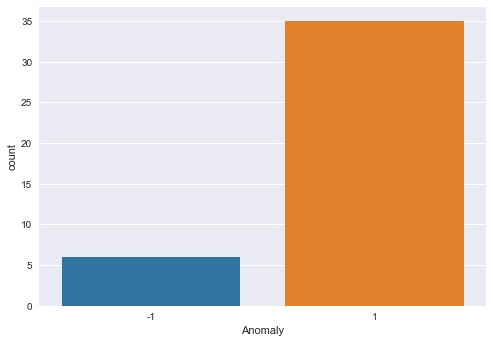

In [12]:
# Summary of the Anomaly Labels
sb.countplot(x = WeekDeathVac_LabeledBox["Anomaly"], palette = 'tab10')

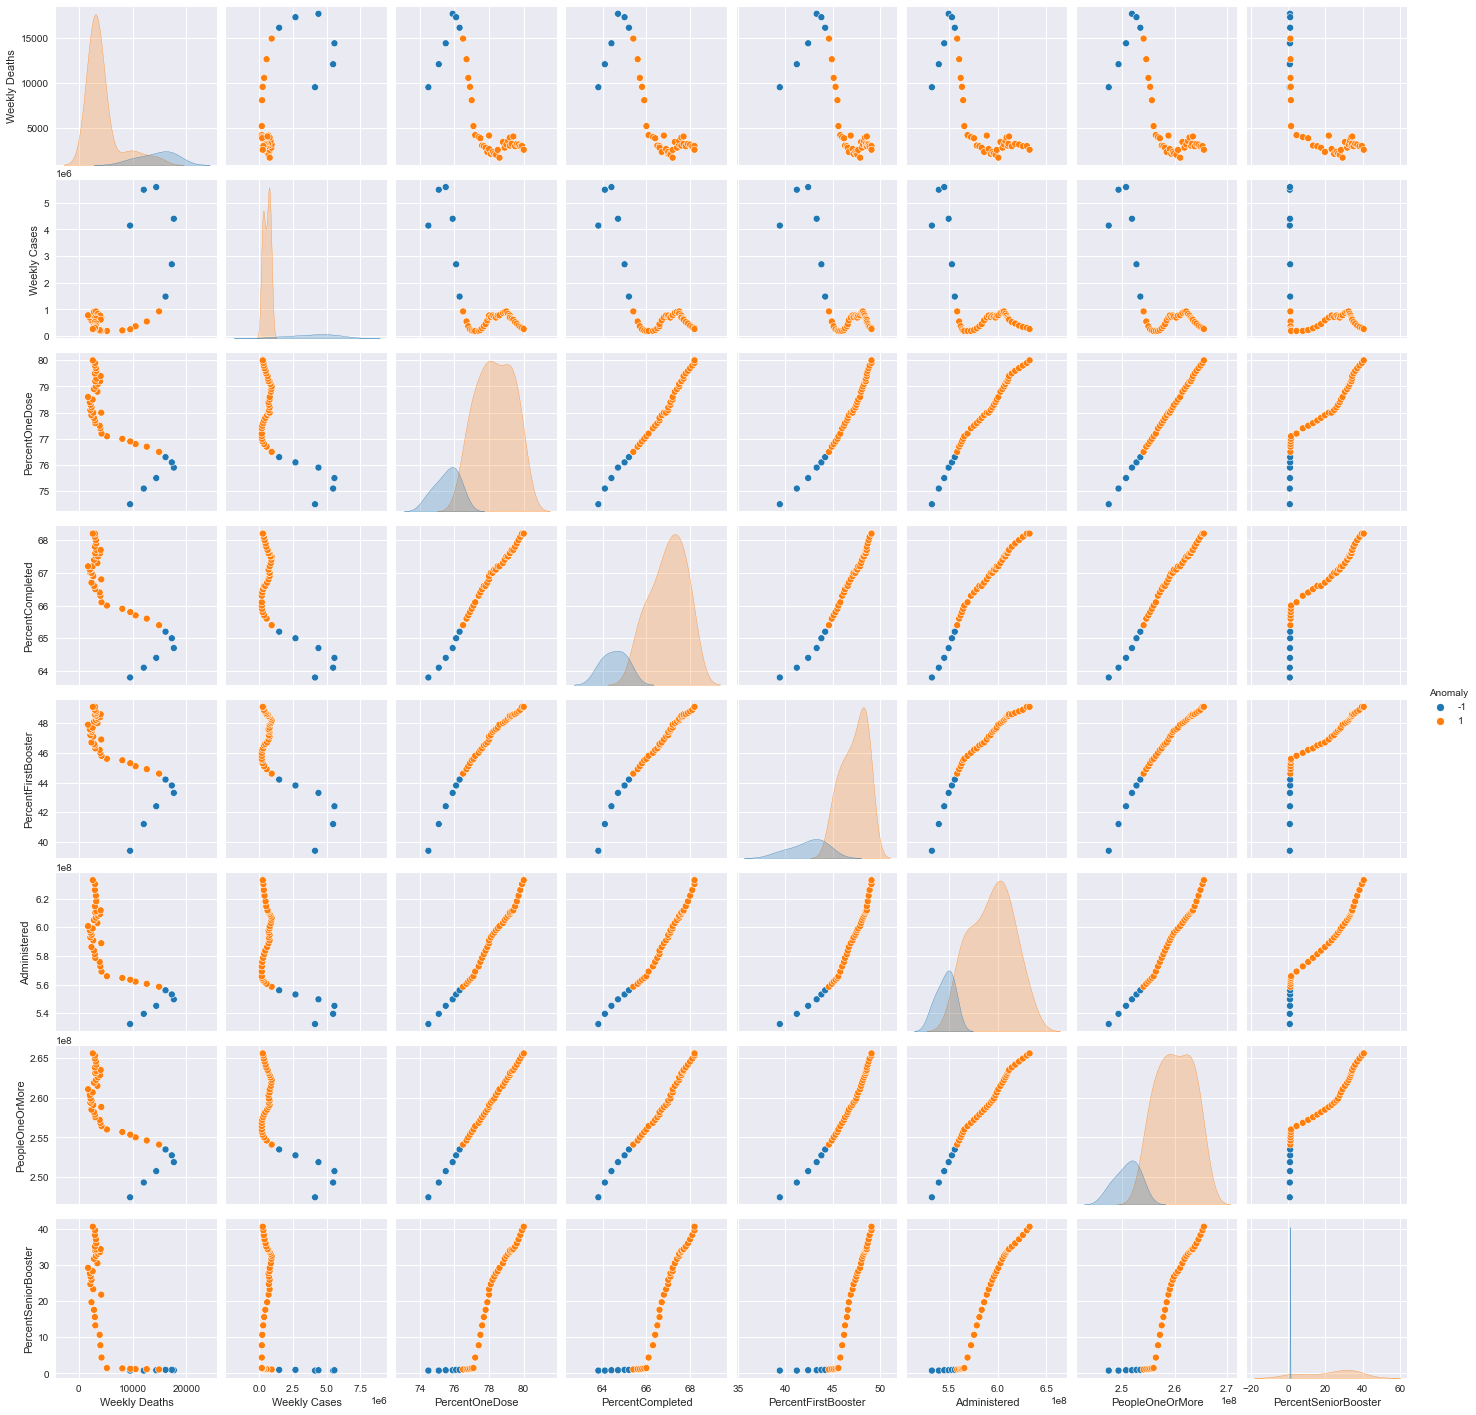

In [13]:
# Visualize the Anomalies in the Data
sb.pairplot(WeekDeathVac_LabeledBox, vars = WeekDeathVac.columns.values, hue = "Anomaly", palette = 'tab10')

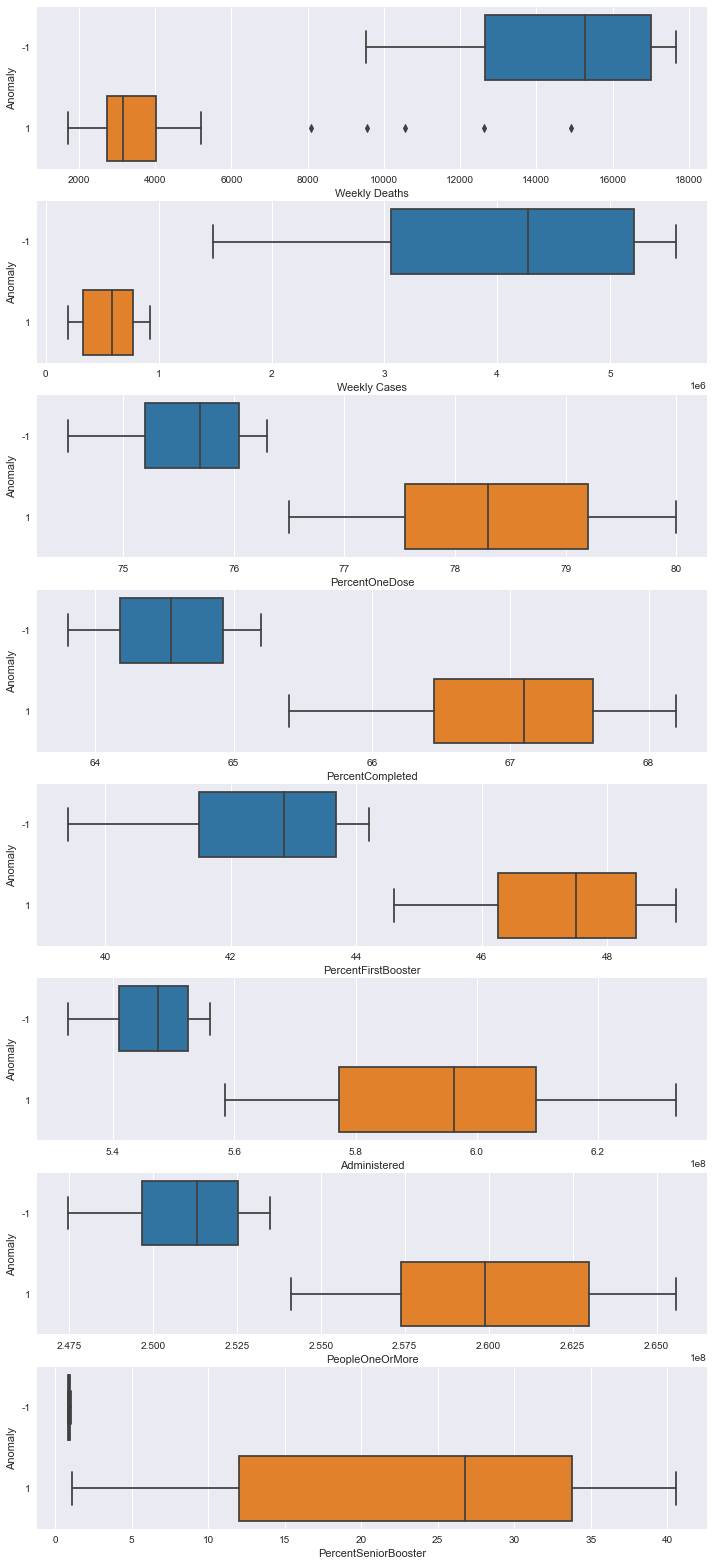

In [14]:
# Boxplots for all Features against the Anomalies
f, axes = plt.subplots(8, 1, figsize=(12,28))

count = 0
for var in WeekDeathVac:
    sb.boxplot(x = var, y = 'Anomaly', data = WeekDeathVac_LabeledBox, ax = axes[count], palette = 'tab10')
    count += 1